In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
!ls

 Beer_Dataset2.csv	     XGBoost-Copy1.ipynb
'Data Preprocessing.ipynb'   XGBoost.ipynb
 LASSO.ipynb		     beer2-updated.csv
 LightGBM-Copy1.ipynb	     beer2.csv
 LightGBM.ipynb		     beer2_ds.csv
 Presentation		     beer_ds.csv
'Previous Work'		    'updated dataset.ipynb'
'Random Forest.ipynb'	    'updated_ds_Random Forest.ipynb'


In [3]:
beer = pd.read_csv("beer2_ds.csv")

In [4]:
beer

,Sample,Class,QC,0,1,2,3,4,5,6,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685
0,5102023_All_QC_003,All,1,1206145,1274830,2207415,4359182,177840,269556,1036610,...,47968,91172,137430,81283,58446,1579045,33833,70105,12436,53816
1,5102023_All_QC_040,All,1,892381,945133,1688109,3208560,135325,478907,539238,...,35206,57453,4010,60423,63424,1472180,62940,76586,11361,44397
2,5102023_BLD_1_022,Blonde,0,967402,1039500,3407085,1738776,449647,727863,923668,...,39964,11866,8123,96319,61191,8758,54,90265,18840,372
3,5102023_BLD_2_023,Blonde,0,984546,1056546,3539493,1735118,225435,150396,4340521,...,13800,6044,5769,8975,5635,2848,262,78235,15432,231
4,5102023_BLD_QC_021,Blonde,1,986604,1059673,1855423,3381080,146978,148355,610422,...,38476,22734,7539,39845,27754,5043,62,78880,9340,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,592023_STU_2_008,Stout,0,926734,991006,1746892,3100788,1033615,1424326,1402140,...,17666,10654,221774,137235,101334,2832827,44758,14757,857,80338
67,592023_STU_QC_006,Stout,1,964519,1022076,1842175,3425686,654969,1449777,1478993,...,7289,26478,354104,114836,85896,1770868,22828,20829,1139,71852
68,592023_WHE_1_027,Wheat,0,823458,872604,1530622,2835754,342958,433742,1331621,...,133123,41372,3170,36145,41646,7085,67,49520,2875,106
69,592023_WHE_2_028,Wheat,0,817188,858183,1485663,2986838,168233,254985,1263554,...,3149,15489,8732,47852,25502,4663319,155583,50530,4166,126671


In [5]:
beer.isnull().sum()

Sample    0
Class     0
QC        0
0         0
1         0
         ..
2681      0
2682      0
2683      0
2684      0
2685      0
Length: 2689, dtype: int64

In [6]:
beer.columns

Index(['Sample', 'Class', 'QC', '0', '1', '2', '3', '4', '5', '6',
       ...
       '2676', '2677', '2678', '2679', '2680', '2681', '2682', '2683', '2684',
       '2685'],
      dtype='object', length=2689)

# Data Exploration and Normalization

Observing min and max feature values for each sample, the higher the feature value the more prevalent the feature is in this sample

In [7]:
#feature values (excluding the label and sample names)
feature_values = beer.iloc[:, 1:].values

# maximum value for each feature
max_feature_values = np.max(feature_values, axis=0)

# minimum value for each feature
min_feature_values = np.min(feature_values, axis=0)

result_df = pd.DataFrame({
    'Feature Index': range(1, len(max_feature_values) + 1),
    'Min Feature Value': min_feature_values,
    'Max Feature Value': max_feature_values})
print(result_df)


      Feature Index Min Feature Value Max Feature Value
0                 1               All             Wheat
1                 2                 0                 1
2                 3            479734           1315544
3                 4            507948           1759020
4                 5            466169           4088947
...             ...               ...               ...
2683           2684                 0           6472603
2684           2685                 0            241154
2685           2686                 0            407731
2686           2687                 0            444990
2687           2688                 0            246497

[2688 rows x 3 columns]


In [8]:
beer.index

RangeIndex(start=0, stop=71, step=1)

#  Normalizing Feature Values


In [9]:
#extracting only the feature columns (excluding the quality control column)
numeric_columns = beer.select_dtypes(include=['int64']).columns[1:]
X_features = beer[numeric_columns]
#apply z-score normalization
X_normalized = (X_features - X_features.mean()) / X_features.std()
#replacing original feature values with normalized values
beer[numeric_columns] = X_normalized

In [10]:
beer

,Sample,Class,QC,0,1,2,3,4,5,6,...,2676,2677,2678,2679,2680,2681,2682,2683,2684,2685
0,5102023_All_QC_003,All,1,1.809258,1.194079,0.459027,1.725280,-0.662678,-0.757899,-0.122617,...,0.625009,1.232157,1.053329,0.591885,0.493292,0.359014,-0.023946,0.423856,-0.018859,0.254570
1,5102023_All_QC_040,All,1,0.094267,-0.062359,-0.191927,0.757690,-0.737201,-0.432879,-0.595712,...,0.279311,0.462032,-0.365107,0.033474,0.639567,0.293633,0.449159,0.550038,-0.038908,0.099415
2,5102023_BLD_1_022,Blonde,0,0.504321,0.297263,1.962822,-0.478292,-0.186236,-0.046372,-0.230046,...,0.408196,-0.579153,-0.321381,0.994390,0.573952,-0.601711,-0.572990,0.816360,0.100581,-0.625789
3,5102023_BLD_2_023,Blonde,0,0.598028,0.362223,2.128796,-0.481368,-0.579250,-0.942896,3.020027,...,-0.300538,-0.712125,-0.346407,-1.343762,-1.058524,-0.605327,-0.569609,0.582143,0.037019,-0.628112
4,5102023_BLD_QC_021,Blonde,1,0.609277,0.374140,0.017802,0.902767,-0.716775,-0.946064,-0.528002,...,0.367889,-0.330933,-0.327589,-0.517389,-0.408572,-0.603984,-0.572860,0.594701,-0.076601,-0.627733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,592023_STU_2_008,Stout,0,0.282036,0.112458,-0.118242,0.667061,0.837384,1.034895,0.225071,...,-0.195815,-0.606835,1.950021,2.089690,1.753527,1.126097,0.153629,-0.653737,-0.234815,0.691456
67,592023_STU_QC_006,Stout,1,0.488563,0.230862,0.001196,0.940277,0.173667,1.074408,0.298173,...,-0.476908,-0.245422,3.356869,1.490081,1.299892,0.476375,-0.202821,-0.535519,-0.229556,0.551670
68,592023_WHE_1_027,Wheat,0,-0.282456,-0.338759,-0.389338,0.444187,-0.373248,-0.502998,0.157994,...,2.931697,0.094750,-0.374038,-0.616436,-0.000365,-0.602734,-0.572779,0.023078,-0.197178,-0.630171
69,592023_WHE_2_028,Wheat,0,-0.316727,-0.393716,-0.445694,0.571238,-0.679518,-0.780520,0.093250,...,-0.589053,-0.496406,-0.314906,-0.303046,-0.474745,2.246020,1.954979,0.042743,-0.173100,1.454679


# Random Forest Classifier For Feature Importance

In [11]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import GridSearchCV

In [12]:
# Removing 'Sample' column, it is not needed for this analysis
data_cleaned = beer.drop(['Sample'], axis=1)
missing_values = data_cleaned.isnull().sum().sum()
unique_classes = data_cleaned['Class'].unique()
qc_distribution = data_cleaned['QC'].value_counts(normalize=True)
missing_values, unique_classes, qc_distribution

(0,
 array(['All', 'Blonde', 'German', 'IPA', 'Sour', 'Stout', 'Wheat'],
       dtype=object),
 0    0.676056
 1    0.323944
 Name: QC, dtype: float64)

In [13]:
# Exclude QC samples
data_no_qc = data_cleaned[data_cleaned['QC'] == 0].drop('QC', axis=1)

# exclude 'All' and 'Water' classes
data_final = data_no_qc[~data_no_qc['Class'].isin(['All', 'Water'])]

# Encode the 'Class' column using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_final['Class'] = le.fit_transform(data_final['Class'])

# Prepare features (X) and target (y) for model training
X = data_final.drop('Class', axis=1)
y = data_final['Class']



In [14]:
# Feature scaling using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features and the encoded classes
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['Class'] = y.reset_index(drop=True)  # Reset index for proper alignment

X_scaled_df.head(), le.classes_

(          0         1         2         3         4         5         6  \
 0  0.464375  0.371579  1.993775 -0.453424 -0.194811  0.009035 -0.260646   
 1  0.558462  0.441077  2.152566 -0.456548 -0.907172 -0.996273  2.494653   
 2  0.421442  0.297813  0.072168  1.016695 -1.173317 -1.009562 -0.662752   
 3  0.423242  0.295224  0.055786  0.716370 -0.929587 -0.220180 -0.777497   
 4  0.271388  0.196889  0.030773  1.024401 -0.270755 -0.528471 -0.349617   
 
           7         8         9  ...      2677      2678      2679      2680  \
 0 -0.569478 -0.796027 -0.091483  ... -0.443769 -0.267325  0.956375  0.609127   
 1 -0.597264 -0.811228  1.657820  ... -0.574190 -0.294391 -1.276755 -0.981558   
 2 -0.618983 -0.829505 -0.255488  ... -0.275288 -0.251365 -0.394487 -0.387098   
 3 -0.628998 -0.525684 -0.804922  ... -0.335817 -0.330357 -0.083642 -0.648280   
 4 -0.157984  1.302451 -0.551813  ... -0.385167 -0.323918 -0.418290 -0.255734   
 
        2681      2682      2683      2684      2685  

# Top 20 features using RF

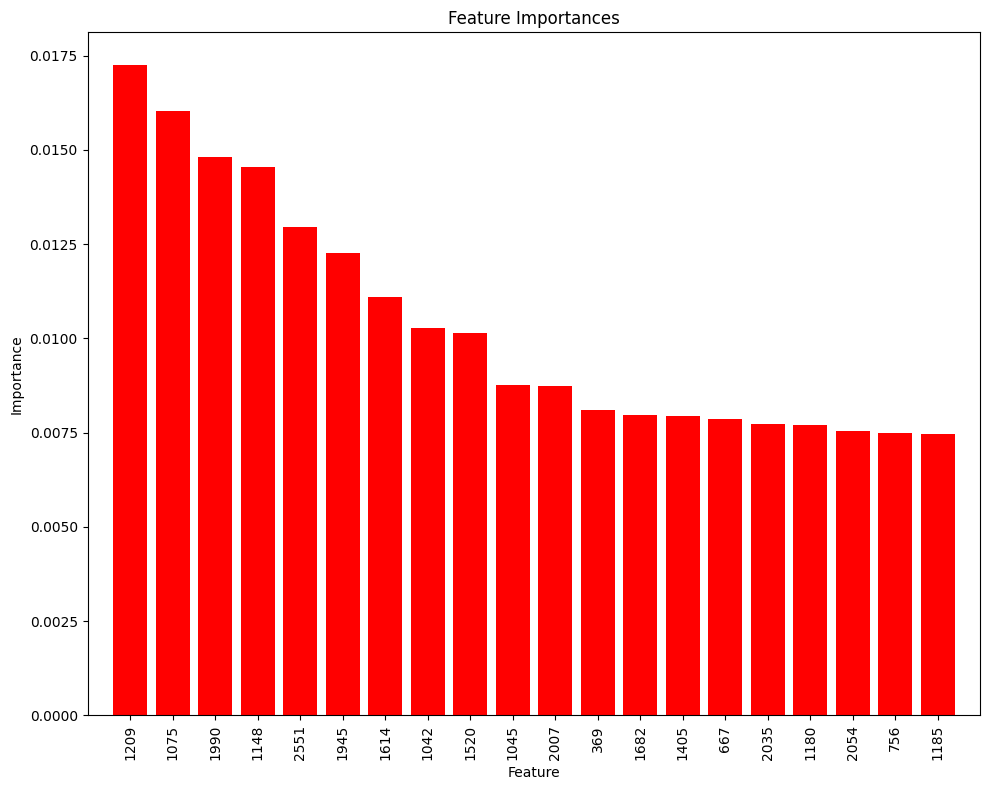

,Feature,Importance
0,1209,0.017253
1,1075,0.016042
2,1990,0.014805
3,1148,0.014537
4,2551,0.012954
5,1945,0.012255
6,1614,0.011090
7,1042,0.010280
8,1520,0.010150
9,1045,0.008764


In [33]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model
rf.fit(X_scaled, y)

# Get feature importances
importances = rf.feature_importances_

# Sort the feature importances
indices = np.argsort(importances)[::-1]

# Select the top 20 features
top_20_indices = indices[:20]
top_20_importances = importances[top_20_indices]
top_20_features = X.columns[top_20_indices]

# Calculate the cumulative sum of feature importances for explanation
cumulative_importances = np.cumsum(top_20_importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(len(top_20_indices)), top_20_importances, color='r', align='center')
plt.xticks(range(len(top_20_indices)), top_20_features, rotation=90)
plt.xlim([-1, len(top_20_indices)])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.tight_layout()
plt.show()

# Display the top 20 features
top_20_features_importances = pd.DataFrame({'Feature': top_20_features, 'Importance': top_20_importances})
top_20_features_importances


In [38]:
# Save top features to a CSV file
top_20_features_importances.to_csv('top_20_rf.csv', index=False)

In [34]:
# Calculate the total variation explained by the top 20 features
total_variation_explained = cumulative_importances[-1]
total_variation_explained
print("Total Variation Explained (Top 20):", total_variation_explained)


Total Variation Explained (Top 20): 0.20661321211855632


This was just one method to find the top 20 important features and these 20 variables explain 16% of variations

# Feature Visualization with t-SNE and PCA

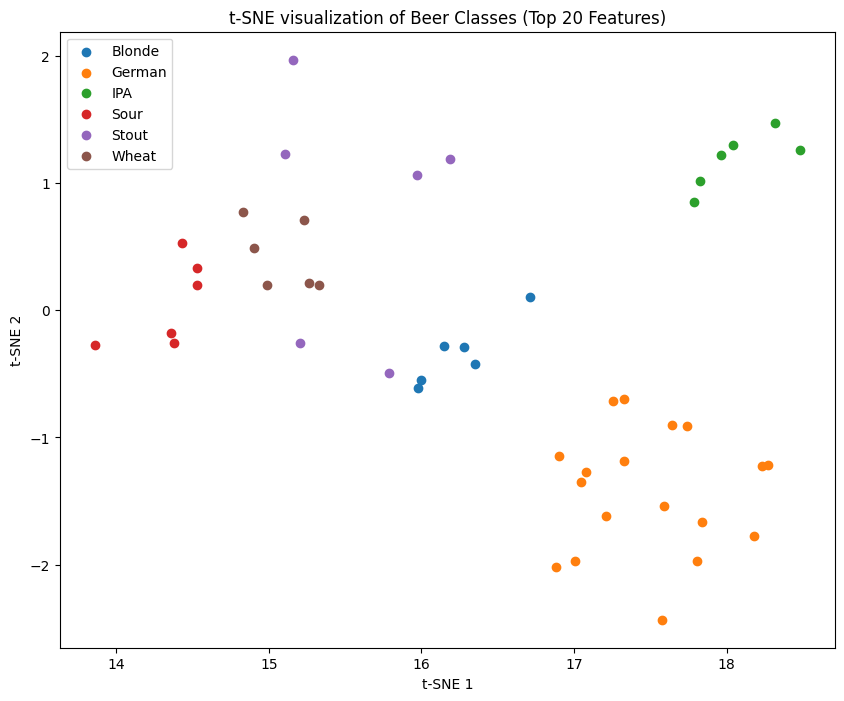

In [35]:
from sklearn.manifold import TSNE

# Selecting only the top 20 features for t-SNE visualization
X_top_20 = X_scaled[:, top_20_indices]

# Initialize and fit the t-SNE model
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_top_20)

# Plotting the results
plt.figure(figsize=(10, 8))

# Different classes have been encoded from 0 onwards; plotting each class
for class_id in np.unique(y):
    plt.scatter(X_tsne[y == class_id, 0], X_tsne[y == class_id, 1], label=le.inverse_transform([class_id])[0])

plt.title('t-SNE visualization of Beer Classes (Top 20 Features)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()


In [36]:
from sklearn.decomposition import PCA

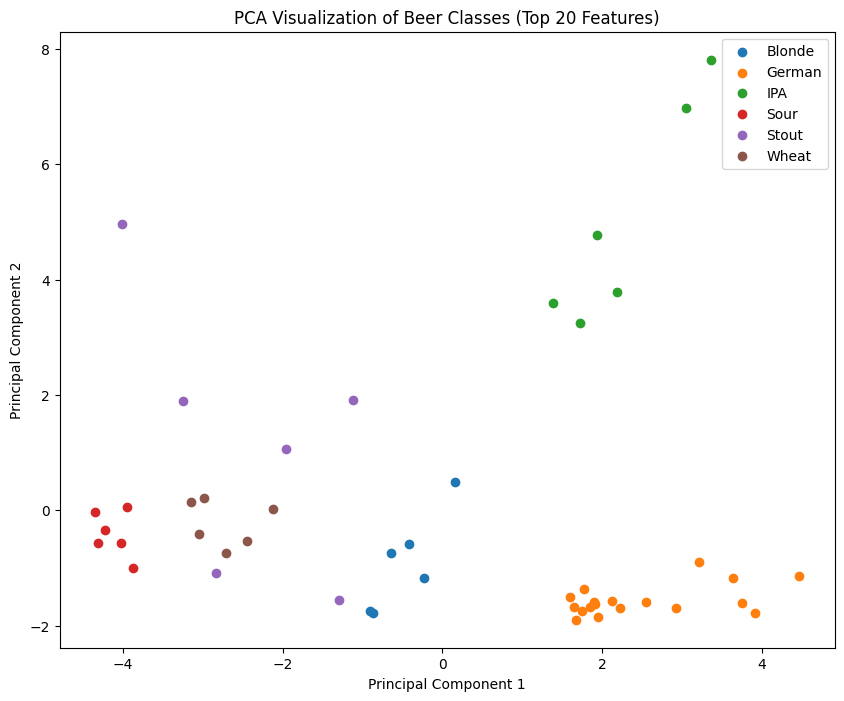

In [37]:
# Initialize and fit the PCA model
pca = PCA(n_components=2, random_state=42)
X_pca_top_20 = pca.fit_transform(X_top_20)

# Plotting the results
plt.figure(figsize=(10, 8))

# Different classes have been encoded from 0 onwards; plotting each class
for class_id in np.unique(y):
    plt.scatter(X_pca_top_20[y == class_id, 0], X_pca_top_20[y == class_id, 1], label=le.inverse_transform([class_id])[0])

plt.title('PCA Visualization of Beer Classes (Top 20 Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Top 600 using RF

In [20]:
# # Initialize the Random Forest classifier
# rf = RandomForestClassifier(n_estimators=100, random_state=42)

# # Fit the model
# rf.fit(X_scaled, y)

# # Get feature importances
# importances = rf.feature_importances_

# # Sort the feature importances
# indices = np.argsort(importances)[::-1]

# # Select the top 600 features
# top_600_indices = indices[:600]
# top_600_importances = importances[top_600_indices]
# top_600_features = X.columns[top_600_indices]

# # Calculate the cumulative sum of feature importances for explanation
# cumulative_importances2 = np.cumsum(top_600_importances)

# plt.figure(figsize=(10, 8))
# plt.title('Feature Importances')
# plt.bar(range(len(top_600_indices)), top_600_importances, color='r', align='center')
# plt.xticks(range(len(top_600_indices)), top_600_features, rotation=90)
# plt.xlim([-1, len(top_600_indices)])
# plt.ylabel('Importance')
# plt.xlabel('Feature')
# plt.tight_layout()
# plt.show()

# # Display the top 600 features
# top_600_features_importances = pd.DataFrame({'Feature': top_600_features, 'Importance': top_600_importances})
# top_600_features_importances


In [22]:
# # Calculate the total variation explained by the top 20 features
# total_variation_explained2 = cumulative_importances2[-1]
# print("Total Variation Explained (Top 600):", total_variation_explained2)


In [23]:
# top 608 gives 1.0 total variation explained
# these 608 features, capture 100% of the vairiance 

 a total variation explained of 0.99789 (or 99.789%) means that the top 600 features account for approximately 99.789% of the total variability present in the dataset. This high value suggests that a significant amount of information or variance in the data is captured by these features.
 
 In practical terms, it implies that you can potentially achieve good model performance using only these top 600 features, which can be beneficial for model interpretability and computational efficiency

In [24]:
# from sklearn.manifold import TSNE

# # Selecting only the top 600 features for t-SNE visualization
# X_top_600 = X_scaled[:, top_600_indices]

# # Initialize and fit the t-SNE model
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(X_top_600)

# # Plotting the results
# plt.figure(figsize=(10, 8))

# # Different classes have been encoded from 0 onwards; plotting each class
# for class_id in np.unique(y):
#     plt.scatter(X_tsne[y == class_id, 0], X_tsne[y == class_id, 1], label=le.inverse_transform([class_id])[0])

# plt.title('t-SNE visualization of Beer Classes (Top 600 features)')
# plt.xlabel('t-SNE 1')
# plt.ylabel('t-SNE 2')
# plt.legend()
# plt.show()


In [25]:
# # Initialize and fit the PCA model
# pca = PCA(n_components=2, random_state=42)
# X_pca_top_600 = pca.fit_transform(X_top_600)

# # Plotting the results
# plt.figure(figsize=(10, 8))

# # Different classes have been encoded from 0 onwards; plotting each class
# for class_id in np.unique(y):
#     plt.scatter(X_pca_top_600[y == class_id, 0], X_pca_top_600[y == class_id, 1], label=le.inverse_transform([class_id])[0])

# plt.title('PCA Visualization of Beer Classes (Top 600 Features)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()


In [26]:
# # Select the top 20 features from the top 600
# top_20_from_600_indices = top_600_indices[:20]
# top_20_from_600_importances = importances[top_20_from_600_indices]
# top_20_from_600_features = X.columns[top_20_from_600_indices]
# cumulative_importances_from_600 = np.cumsum(top_20_from_600_importances)

# # Display the top 20 features from the top 600
# top_20_from_600_features_importances = pd.DataFrame({'Feature': top_20_from_600_features, 'Importance': top_20_from_600_importances})
# print(top_20_from_600_features_importances)

# # Calculate the total variation explained by the top 20 from the top 600
# total_variation_explained_from_600 = cumulative_importances_from_600[-1]
# print("Total Variation Explained (Top 20 from Top 600 Features):", total_variation_explained_from_600)


In [27]:
# # Selecting only the top 20 features from the top 600 for t-SNE visualization
# X_top_20_from_600 = X_scaled[:, top_20_from_600_indices]

# # Initialize and fit the t-SNE model
# tsne = TSNE(n_components=2, random_state=42)
# X_tsne_top_20_from_600 = tsne.fit_transform(X_top_20_from_600)

# # Plotting the results
# plt.figure(figsize=(10, 8))

# # Different classes have been encoded from 0 onwards; plotting each class
# for class_id in np.unique(y):
#     plt.scatter(X_tsne_top_20_from_600[y == class_id, 0], X_tsne_top_20_from_600[y == class_id, 1], label=le.inverse_transform([class_id])[0])

# plt.title('t-SNE Visualization of Beer Classes (Top 20 from Top 600 Features)')
# plt.xlabel('t-SNE 1')
# plt.ylabel('t-SNE 2')
# plt.legend()
# plt.show()


In [28]:
# # Selecting only the top 20 features from the top 600 for PCA visualization
# X_top_20_from_600 = X_scaled[:, top_20_from_600_indices]

# # Initialize and fit the PCA model
# pca = PCA(n_components=2, random_state=42)
# X_pca_top_20_from_600 = pca.fit_transform(X_top_20_from_600)

# # Plotting the results
# plt.figure(figsize=(10, 8))

# # Different classes have been encoded from 0 onwards; plotting each class
# for class_id in np.unique(y):
#     plt.scatter(X_pca_top_20_from_600[y == class_id, 0], X_pca_top_20_from_600[y == class_id, 1], label=le.inverse_transform([class_id])[0])

# plt.title('PCA Visualization of Beer Classes (Top 20 from Top 600 Features)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()


In [29]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the K-Fold cross-validation splitter
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(rf, X, y, cv=kf, scoring='accuracy')

# Calculate mean and standard deviation of scores
mean_score = scores.mean()
std_score = scores.std()

print("Mean Accuracy:", mean_score)
print("Standard Deviation of Accuracy:", std_score)


Mean Accuracy: 0.8400000000000001
Standard Deviation of Accuracy: 0.14966629547095767


In [30]:
from sklearn.model_selection import KFold, cross_val_score

# Define the number of folds for k-fold cross-validation
n_folds = 5

# Initialize the k-fold cross-validation splitter
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize the model (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


Cross-Validation Scores: [0.8 0.8 0.6 1.  1. ]
Mean CV Score: 0.8400000000000001
Standard Deviation of CV Scores: 0.14966629547095767
